In [2]:
from glob import glob

import numpy as np

import matplotlib.pyplot as plt

import cv2 as cv

from astropy.io import fits

In [3]:
psf_injected = glob('/data/scratch/bariskurtkaya/dataset/PSF_INJECTION/*')

In [4]:
len(psf_injected), psf_injected[0]

(64090,
 '/data/scratch/bariskurtkaya/dataset/PSF_INJECTION/jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x143-y252-fc2.png')

In [5]:
count = {}

for idx, dir in enumerate(psf_injected):
    try:
        count['-'.join(dir.split('/')[-1].split('-')[:-1])] += 1
    except KeyError:
        count['-'.join(dir.split('/')[-1].split('-')[:-1])] = 1


In [6]:
for key, value in count.items():
    if value != 7:
        print(key, value)

jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r-x52-y96 5


In [7]:
for idx in range(20):
    print(psf_injected[idx].split('/')[-1])

jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x143-y252-fc2.png
jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x239-y292-fc10000.png
jw01386-a3001_t002_nircam_f356w-maskrnd-sub320a335r-x75-y100-fc2.png
jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x16-y296-fc100.png
jw01386-a3001_t004_nircam_f360m-maskrnd-sub320a335r-x249-y318-fc2.png
jw01386-a3001_t002_nircam_f410m-maskrnd-sub320a335r-x70-y149-fc10000.png
jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x179-y218-fc1.png
jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x28-y234-fc1000.png
jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r-x299-y196-fc100.png
jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x133-y62-fc1.png
jw01386-a3001_t002_nircam_f250m-maskrnd-sub320a335r-x158-y28-fc1000.png
jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x21-y84-fc5.png
jw01386-a3001_t002_nircam_f356w-maskrnd-sub320a335r-x22-y273-fc100.png
jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x8-y164-fc1000.png
jw01386-

(320, 320) jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x143-y252-fc2.png (320, 320) jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-x110-y22-fc10.png


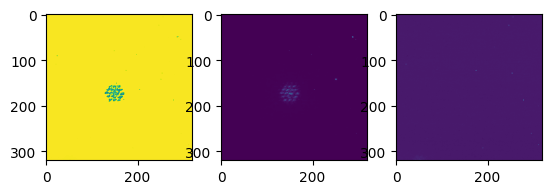

In [8]:
inject2 = psf_injected[47213]
inject = psf_injected[0]

image2 = cv.imread(inject2, 0)
image = cv.imread(inject, 0)


print(image.shape, inject.split('/')[-1], image2.shape, inject2.split('/')[-1])

plt.subplot(1, 3, 1)
plt.imshow(np.arcsinh(np.abs(image-image2)))

plt.subplot(1, 3, 2)
plt.imshow(image)

plt.subplot(1, 3, 3)
plt.imshow(image2)

In [9]:
!ls /data/scratch/bariskurtkaya/dataset/PSF_INJECTION | wc -l
#!rm -rf /data/scratch/bariskurtkaya/dataset/PSF_INJECTION
#!mkdir /data/scratch/bariskurtkaya/dataset/PSF_INJECTION
#!ls /data/scratch/bariskurtkaya/dataset/PSF_INJECTION | wc -l

64090


In [10]:
# Test algorithm will be something like this.

# psf - injection = generated_psf * some_constant

In [11]:
real_psf_dir = glob('/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/*psfstack.fits')

In [12]:
real_psf_dir

['/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f410m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f300m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f356w-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f410m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f444w-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/138

In [13]:
f360 = fits.open(real_psf_dir[-1])

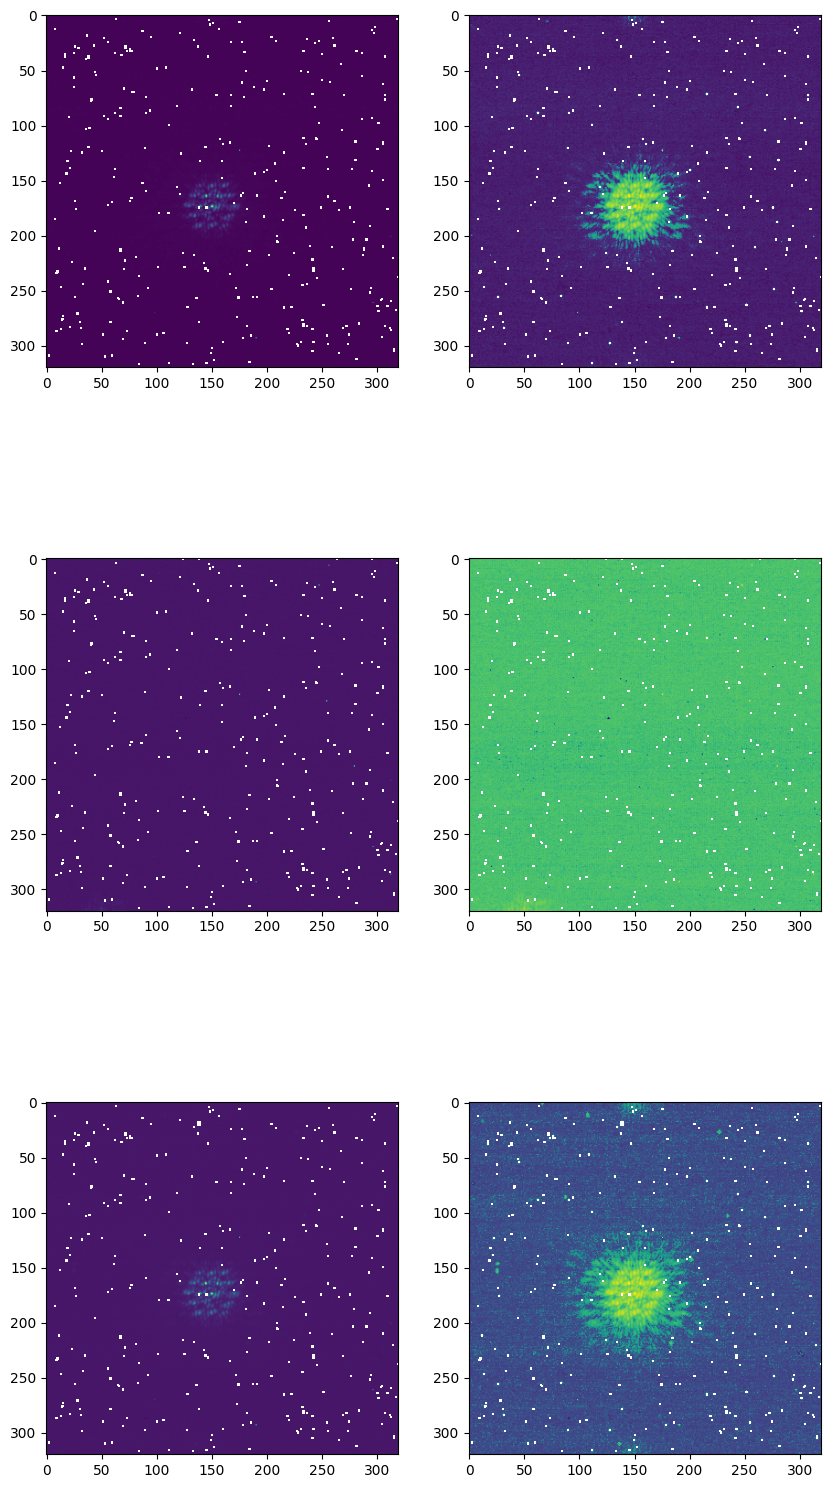

In [14]:
plt.figure(figsize=(10, 20))

plt.subplot(3, 2, 1)
plt.imshow(f360[1].data[0])

plt.subplot(3, 2, 2)
plt.imshow(np.arcsinh(f360[1].data[0]))

plt.subplot(3, 2, 3)
plt.imshow(f360[1].data[120])

plt.subplot(3, 2, 4)
plt.imshow(np.arcsinh(f360[1].data[120]))

plt.subplot(3, 2, 5)
plt.imshow(f360[1].data[213])

plt.subplot(3, 2, 6)
plt.imshow(np.arcsinh(f360[1].data[213]))

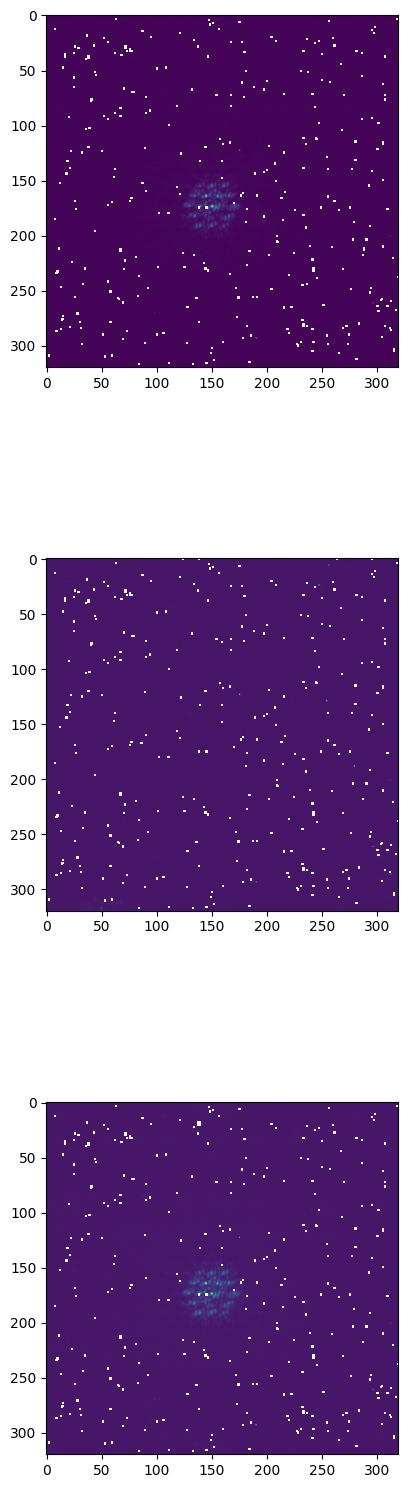

In [31]:
plt.figure(figsize=(10, 20))

plt.subplot(3, 2, 1)
plt.imshow(f360[1].data[0])

plt.subplot(3, 2, 3)
plt.imshow(f360[1].data[120])

plt.subplot(3, 2, 5)
plt.imshow(f360[1].data[213])


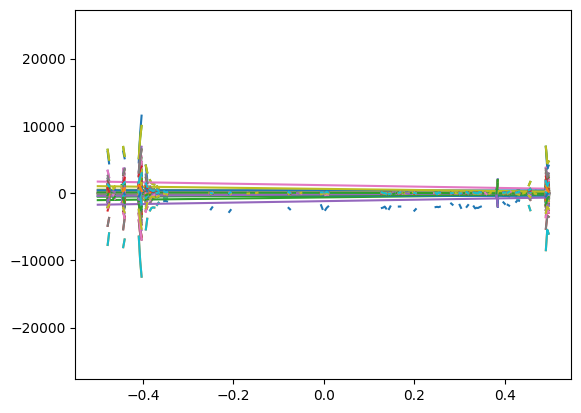

In [16]:
sp213 = np.fft.fft(f360[1].data[213])
freq213 = np.fft.fftfreq(f360[1].data[213].shape[-1])
plt.plot(freq213, sp213.real, freq213, sp213.imag);

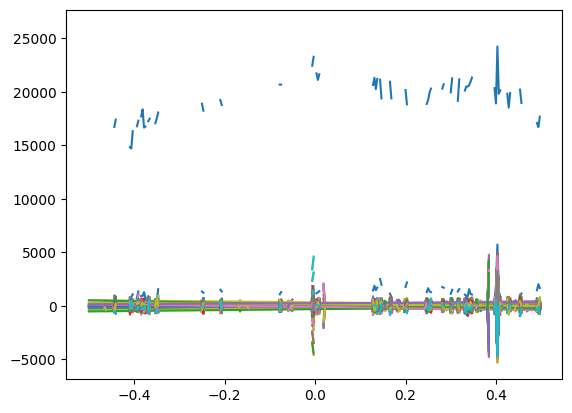

In [17]:
sp120 = np.fft.fft(f360[1].data[120])
freq120 = np.fft.fftfreq(f360[1].data[120].shape[-1])
plt.plot(freq120, sp120.real, freq120, sp120.imag);

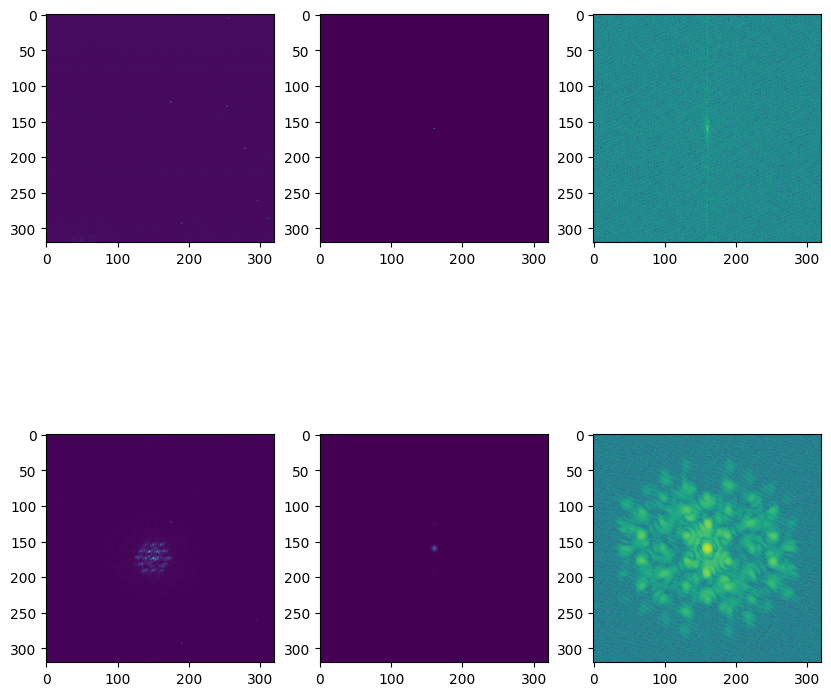

In [34]:
psf_corrupted = np.nan_to_num(f360[1].data[104])

sp104 = np.fft.fft2(psf_corrupted)

sp104_shift = np.fft.fftshift(sp104)

power_spectral_density = np.abs(sp104_shift)**2


plt.figure(figsize=(10, 10))

plt.subplot(2, 3, 1)
plt.imshow(psf_corrupted);

plt.subplot(2, 3, 2)
plt.imshow(power_spectral_density);

plt.subplot(2, 3, 3)
plt.imshow(np.log(power_spectral_density));

psf_not_corrupted = np.nan_to_num(f360[1].data[0])

sp0 = np.fft.fft2(psf_not_corrupted)

sp0_shift = np.fft.fftshift(sp0)

power_spectral_density0 = np.abs(sp0_shift)**2


plt.subplot(2, 3, 4)
plt.imshow(psf_not_corrupted);

plt.subplot(2, 3, 5)
plt.imshow(power_spectral_density0);

plt.subplot(2, 3, 6)
plt.imshow(np.log(power_spectral_density0));



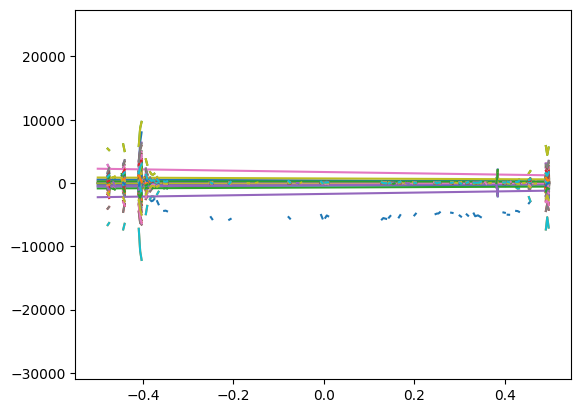

In [19]:
sp0 = np.fft.fft(f360[1].data[0])
freq0 = np.fft.fftfreq(f360[1].data[0].shape[-1])
plt.plot(freq0, sp0.real, freq0, sp0.imag);

In [39]:
np.nanmean(sp213), np.nanmean(sp120), np.nanmean(sp104), np.nanmean(sp0)

((-7.699734549446587-2.648953181561777e-16j),
 (61.29915227475374-1.0194743600036221e-16j),
 (27.245826941270096-3.3097930853782445e-16j),
 (-17.60846479315507+7.868949156992337e-17j))

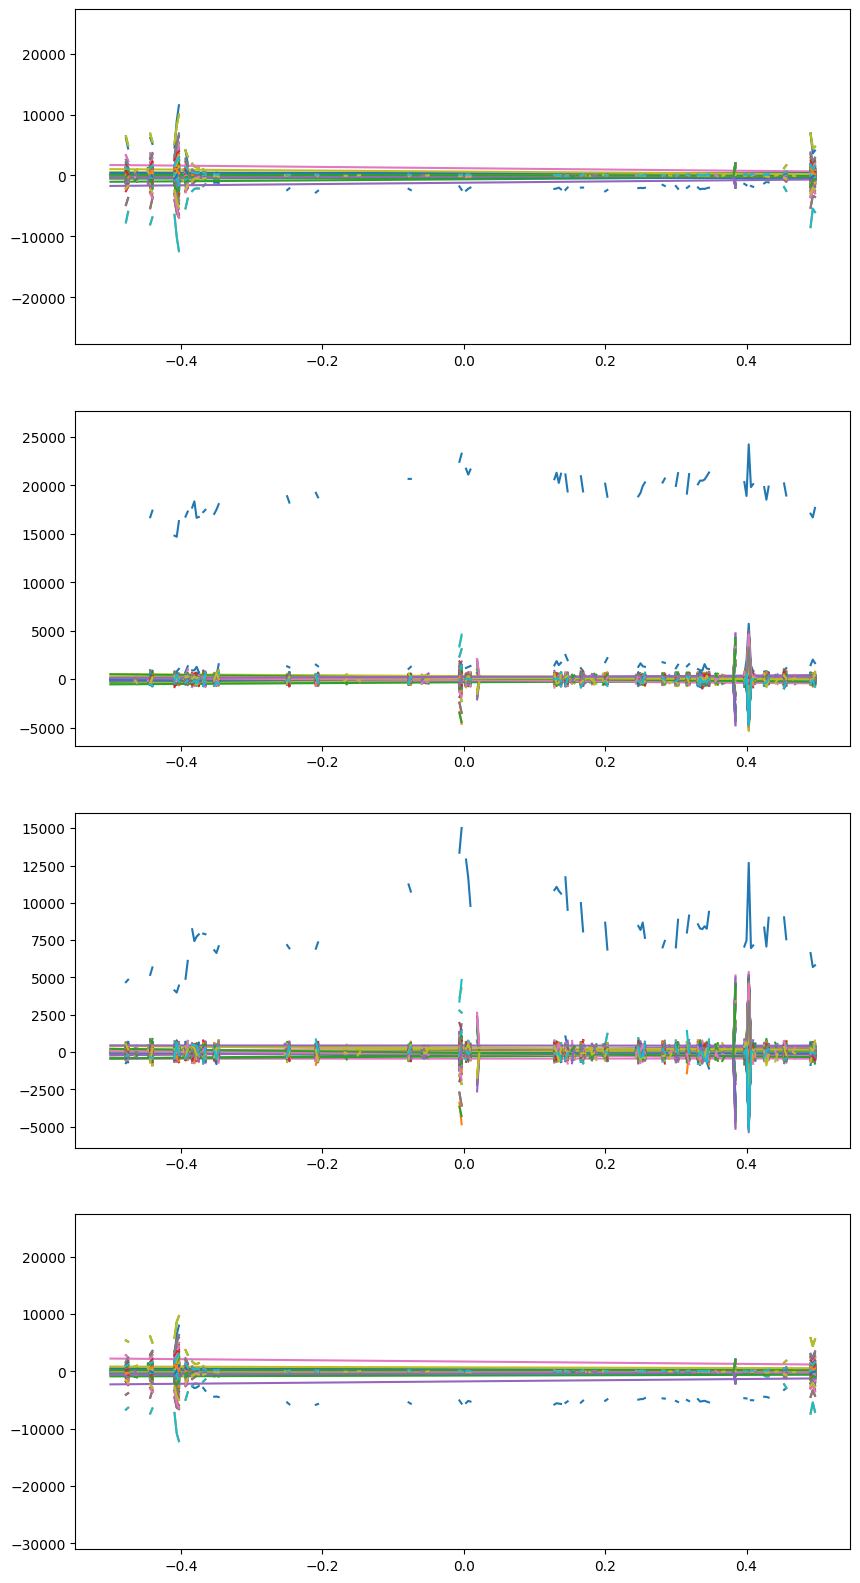

In [42]:
plt.figure(figsize=(10, 20))

plt.subplot(4, 1, 1)
plt.plot(freq213, sp213.real, freq213, sp213.imag);

plt.subplot(4, 1, 2)
plt.plot(freq120, sp120.real, freq120, sp120.imag);

plt.subplot(4, 1, 3)
plt.plot(freq104, sp104.real, freq104, sp104.imag);

plt.subplot(4, 1, 4)
plt.plot(freq0, sp0.real, freq0, sp0.imag);